## LOL Outcome Prediction ##


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lol.csv to lol.csv


In [ ]:
import pandas as pd
import numpy as np
import keras
import sklearn

from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

lol=pd.read_csv('lol.csv')
lol

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
x=lol
x=x.drop(['gameId','blueWins'],axis=1)
y=lol['blueWins']

In [ ]:
import keras

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

net = keras.models.Sequential()
net.add(keras.layers.Dense(300, activation="relu", input_shape=(38,)))
net.add(keras.layers.Dense(2, activation='softmax'))

from keras.optimizers import Adam
Adam=Adam(lr=0.01)

net.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=['Accuracy'])


history = net.fit(x_train, to_categorical(y_train), epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


247/247 [==============================] - 1s 3ms/step - loss: 283.8900 - Accuracy: 0.6342
Epoch 2/10
247/247 [==============================] - 1s 3ms/step - loss: 12.8447 - Accuracy: 0.6339
Epoch 3/10
247/247 [==============================] - 1s 4ms/step - loss: 1.9166 - Accuracy: 0.6452
Epoch 4/10
247/247 [==============================] - 1s 3ms/step - loss: 0.8640 - Accuracy: 0.6778
Epoch 5/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5687 - Accuracy: 0.7090
Epoch 6/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5574 - Accuracy: 0.7133
Epoch 7/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5562 - Accuracy: 0.7118
Epoch 8/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5512 - Accuracy: 0.7206
Epoch 9/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5525 - Accuracy: 0.7162
Epoch 10/10
247/247 [==============================] - 1s 2ms/step - loss: 0.5524 - Accuracy: 0.7220


In [ ]:
test_loss, test_acc=net.evaluate(x_test, to_categorical(y_test))
print(test_acc)

62/62 [==============================] - 0s 2ms/step - loss: 0.5361 - Accuracy: 0.7287
0.7287449240684509


## some notes:

feature selection: all colomns except gameID(irrelavant) and blueWins

acc = num of correct predictions / total num of predictions


3 layers;
neurons 100 100 100;
atvfunc = relu relu relu;
acc = 0.50;


5 layers;
neurons 200 200 200 200 200;
atvfunc = relu relu relu relu relu;
acc = 0.50;


10 layers;
neurons all==400;
atvfunc = all = relu;
acc = 0.48;


3 layers;
neurons 100 100 100;
atvfunc = linear sigmoid tanh;
acc = 0.49;


3 layers;
neurons 500 500 500;
atvfunc = relu;
acc = 0.56;


optimizers of above are all Adam with lr = 0.01;
lossfunc of above are all categorical_crossentropy;


change Adam lr to 0.001,
acc became 0.50,
change it back;

5 layers;
neurons 500 500 500 500 500;
atvfunc = relu;
acc = 0.49;


#############################################################


1 layer;
neurons 500;
atvfunc = relu;
acc = 0.7140688300132751;


1 layer;
neurons 300;
atvfunc = relu;
acc = 0.7317813634872437;
(shown in screenshot below)

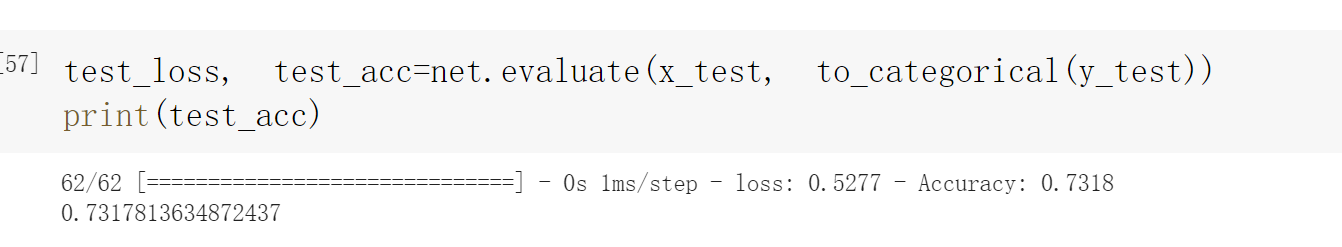